In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [38]:
df_javnats = pd.read_csv("comparaison/outdated/cl-roadshow.csv")
df_sonar = pd.read_csv("comparaison/outdated/coverity-sonar-plugin.csv")
df_javautil = pd.read_csv("comparaison/outdated/git-changelog-plugin.csv")
df_jterm = pd.read_csv("comparaison/outdated/github-autostatus-plugin.csv")
df_clroad = pd.read_csv("comparaison/outdated/GrokkingStreamingSystems.csv")
df_grokking = pd.read_csv("comparaison/outdated/Hyperfoil.csv")
df_gitchange = pd.read_csv("comparaison/outdated/java-nats.csv")
df_kafka = pd.read_csv("comparaison/outdated/java-util.csv")
df_hyperfoil = pd.read_csv("comparaison/outdated/JTerm.csv")
df_langx = pd.read_csv("comparaison/outdated/kafka-connect-elasticsearch-source.csv")
df_ncwms = pd.read_csv("comparaison/outdated/langx-java.csv")
df_sns = pd.read_csv("comparaison/outdated/ncwms.csv")
df_autosat = pd.read_csv("comparaison/outdated/PetHospital.csv")
df_pet = pd.read_csv("comparaison/outdated/sns-itda.csv")
#df_ps = pd.read_csv("comparaison/updated/universal-registrar.csv")

final_df = pd.DataFrame()
final_df = pd.concat([final_df, df_javnats])
final_df = pd.concat([final_df, df_sonar])
final_df = pd.concat([final_df, df_javautil])
final_df = pd.concat([final_df, df_jterm])
final_df = pd.concat([final_df, df_clroad])
final_df = pd.concat([final_df, df_grokking])
final_df = pd.concat([final_df, df_gitchange])
final_df = pd.concat([final_df, df_kafka])
final_df = pd.concat([final_df, df_hyperfoil])
final_df = pd.concat([final_df, df_langx])
final_df = pd.concat([final_df, df_ncwms])
final_df = pd.concat([final_df, df_sns])
final_df = pd.concat([final_df, df_autosat])
final_df = pd.concat([final_df, df_pet])
#final_df = pd.concat([final_df, df_ps])


In [39]:
# df
current_commit = final_df[final_df["CommitSituation"] == "latest commit with update"]
last_commit = final_df[final_df["CommitSituation"] == "last project commit "]

#previous_commit = final_df[final_df["CommitSituation"] == "Previous commit"]

In [42]:
current_commit.shape, last_commit.shape

current_CountClassCoupled_mean = current_commit['Cyclomatic'].mean()
last_CountClassCoupled_mean = last_commit['Cyclomatic'].mean()

print(current_CountClassCoupled_mean)
print(last_CountClassCoupled_mean)

9.097733879023759
9.580701316621221


In [8]:
def calculate_column_pvalue(column_name):
    current_column_Mean  = current_commit[column_name].mean()
    last_column_Mean = last_commit[column_name].mean()

    #previous_column_Mean = previous_commit[column_name].mean()

    current_column_STD  = current_commit[column_name].std()
    last_column_STD = last_commit[column_name].std()

    #previous_column_STD = previous_commit[column_name].std()

    current_count = current_commit.shape[0]
    last_count = last_commit.shape[0]
    #previous_count = previous_commit.shape[0]
    return stats.ttest_ind_from_stats(current_column_Mean,  current_column_STD,  current_count,
                                      last_column_Mean, last_column_STD, last_count).pvalue

In [9]:
calculate_column_pvalue("CountClassCoupled")

0.778316343839693

In [ ]:
""""
PercentLackOfCohesion = calculate_column_pvalue("PercentLackOfCohesion")
PercentLackOfCohesionModified = calculate_column_pvalue("PercentLackOfCohesionModified")
Cyclomatic = calculate_column_pvalue("Cyclomatic")
CountLineCode = calculate_column_pvalue("CountLineCode")
CountLineComment = calculate_column_pvalue("CountLineComment")
#print(CountClassCoupled)
print("PercentLackOfCohesion : "+PercentLackOfCohesion)
print("PercentLackOfCohesionModified : "+PercentLackOfCohesionModified)
print("Cyclomatic : "+Cyclomatic)
print("CountLineCode : "+CountLineCode)
print("CountLineComment : "+CountLineComment)
"""

In [13]:
df_current.cov()

/var/folders/ky/2zmqxq4d1wzbp690y2kpnfbw0000gn/T/ipykernel_89624/657756210.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_current.cov()


,CountClassCoupled,PercentLackOfCohesion,PercentLackOfCohesionModified,Cyclomatic,CountLineCode,CountLineComment
CountClassCoupled,6.740551,8.512236,7.402945,5.568488,-5.648061e+03,852.915006
PercentLackOfCohesion,8.512236,11.170092,9.633659,7.112334,-6.833333e+03,1214.369778
PercentLackOfCohesionModified,7.402945,9.633659,8.324365,6.171134,-6.002583e+03,1025.714871
Cyclomatic,5.568488,7.112334,6.171134,4.619244,-4.604106e+03,739.581610
CountLineCode,-5648.061325,-6833.333190,-6002.582609,-4604.105822,4.977220e+06,-559426.493994
CountLineComment,852.915006,1214.369778,1025.714871,739.581610,-5.594265e+05,304820.921922


In [14]:
count = df_current.shape[0]
print(count)

37


<AxesSubplot: title={'center': 'CountClassCoupled'}, xlabel='CommitSituation'>

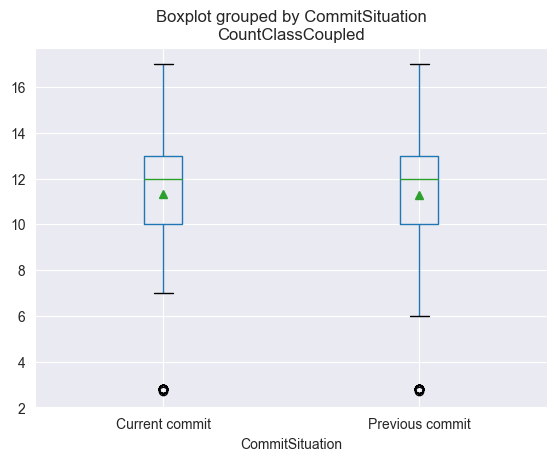

In [33]:
final_df.boxplot(by ='CommitSituation', column =['CountClassCoupled'],showmeans=True, grid = True)
